<a href="https://colab.research.google.com/github/fwang312/Supervised-learning/blob/master/Bank_Loan_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Project Introduction

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. 

Reference: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* X2: Gender (1 = male; 2 = female).
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* X4: Marital status (1 = married; 2 = single; 3 = others).
* X5: Age (year).
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
 - X6 = the repayment status in September, 2005; 
 - X7 = the repayment status in August, 2005; . . .;
 - X11 = the repayment status in April, 2005. 
 
 The measurement scale for the repayment status is: 
 - -1 = pay duly; 
 - 1 = payment delay for one month; 
 - 2 = payment delay for two months; . . .; 
 - 8 = payment delay for eight months; 
 - 9 = payment delay for nine months and above.

- X12-X17: Amount of bill statement (NT dollar). 
 - X12 = amount of bill statement in September, 2005; 
 - X13 = amount of bill statement in August, 2005; . . .; 
 - X17 = amount of bill statement in April, 2005.

- X18-X23: Amount of previous payment (NT dollar). 
 - X18 = amount paid in September, 2005; 
 - X19 = amount paid in August, 2005; . . .;
 - X23 = amount paid in April, 2005.

## 2.Load the data and Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir("/content/gdrive/My Drive/Project/Credit Card Default Detection")
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
'Bank Default.ipynb'	        recall-0.93.ipynb   train.csv
'No merge_Bank Default.ipynb'   test.csv	    UCI_Credit_Card.csv


In [ ]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## 3.Data Exploration

In [ ]:
df.shape

(30000, 25)

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

<function matplotlib.pyplot.show>

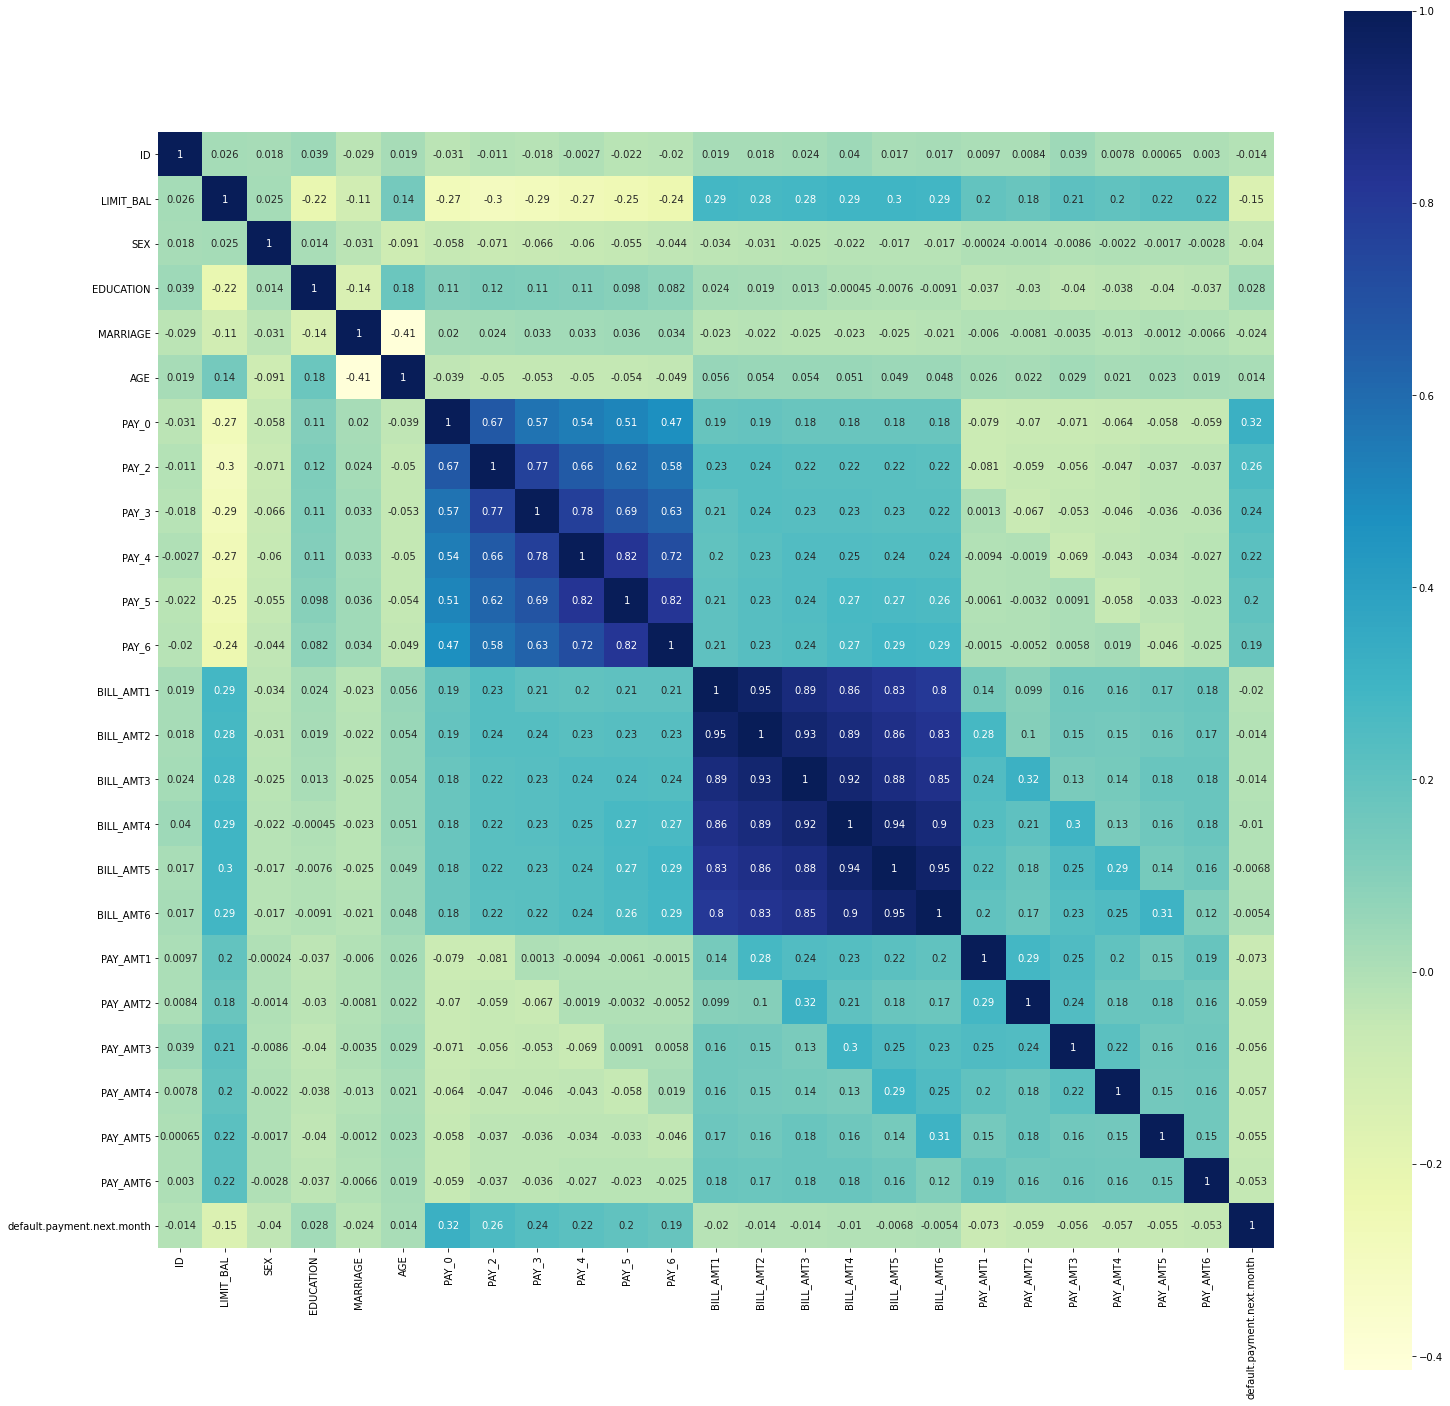

In [ ]:
# Check the relationship for each varaible
plt.figure(figsize=(25,25))
p = sns.heatmap(df.corr(), cmap='YlGnBu', annot = True, square= True)
plt.show

## 4.Baseline model

In [ ]:
X = df.drop(['default.payment.next.month'],axis=1)
y = df['default.payment.next.month']

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 24)
(9000, 24)
(21000,)
(9000,)


### Building a Random Forest Model

In [ ]:
# Import the random forest model
from sklearn.ensemble import RandomForestClassifier

# Running the Random Forest with default parameters
rfc = RandomForestClassifier()

### Fit the Model and make predicitons

In [ ]:
# Fit the model
rfc.fit(X_train, y_train)

# Make prediction
pred = rfc.predict(X_test)

### Model Eveluation

In [ ]:
# Import the classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Check the results of the default modle
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.63      0.36      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



As we can infer we get a recall of 0.36 , goal is to maximize the recall score in order to identify maximum defaulters.

In [ ]:
# Printing confusion martix
print(confusion_matrix(y_test,pred))

[[6627  413]
 [1247  713]]


## 5.Feature Engieering

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
# Rename the columns ti make it more understandable

# SEX changed to GENDER
# PAY_0 changed to PAY_1
# default.payment.next.month is too long and changed to something simplier, default

df.rename(columns={'SEX':'GENDER',
                   'PAY_0':'PAY_1',
                   'default.payment.next.month':'DEFAULT',} , inplace=True)

df.drop('ID', axis=1, inplace=True) # Drop column ID

df.info()  # we see that we have 30,000 observations and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   GENDER     30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [ ]:
# We inspect the data as a whole|
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
GENDER,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


### Creating New Variables

#### Education

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

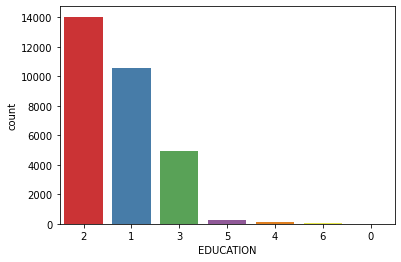

In [ ]:
fig, ax = plt.subplots()
sns.countplot(data = df, x='EDUCATION', order= df['EDUCATION'].value_counts().index, palette="Set1")

1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

Here we have 0 which means there are some undifined variable "0", we can merge the 5,4,6,0 into the same group.

In [ ]:
# Merge every value of x NOT within (and inclusive of ) 1-3 to 4
df['EDUCATION'] = df['EDUCATION'].apply(lambda edu_value: edu_value
                                        if ((edu_value > 0 and edu_value < 4))
                                        else 4) 

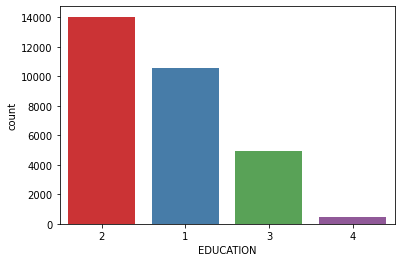

In [ ]:
# Show the value distribution after merging
fig, ax = plt.subplots()
sns.countplot(data = df, x='EDUCATION', order= df['EDUCATION'].value_counts().index, palette="Set1")

#### Marriage


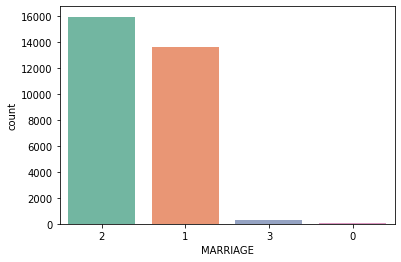

In [ ]:
fig, ax = plt.subplots()
sns.countplot(data=df,x='MARRIAGE', order = df['MARRIAGE'].value_counts().index, palette="Set2");

We already know that: 1=married, 2=single, 3=others

We can merge the undfined one into "3"

In [ ]:
df['MARRIAGE'] = df['MARRIAGE'].apply(lambda marriage_value: marriage_value
                                        if ((marriage_value > 0 and marriage_value < 3))
                                        else 3) 

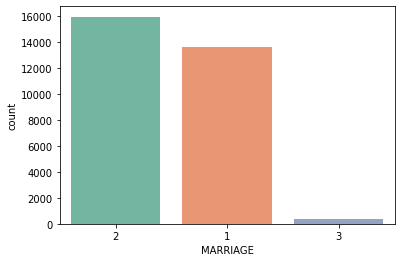

In [ ]:
fig, ax = plt.subplots()
sns.countplot(data=df,x='MARRIAGE', order = df['MARRIAGE'].value_counts().index,palette="Set2");

#### Age


In [ ]:
#Check the distribution if the age in order for group 
df['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

In [ ]:
# Define a group function we can choose divde them either 4 or 5. Here I use 4
def func(x):
  if(x >= 20 and x < 30):
    return 1
  elif(x >= 30 and x < 40):
    return 2
  elif(x >= 40 and x < 50):
    return 3
  elif(x >= 50 and x < 60):
    return 4
  elif(x >= 60 and x < 80):
    return 5

In [ ]:
# Apply the funtion
df['AGE'] = df['AGE'].apply(func)

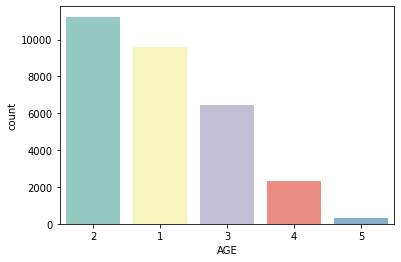

In [ ]:
fig, ax = plt.subplots()
sns.countplot(data=df,x='AGE', order = df['AGE'].value_counts().index,palette="Set3");

### Basic EDA of the categorical data

In [ ]:
df.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,1,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,1,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,2,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,2,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,4,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


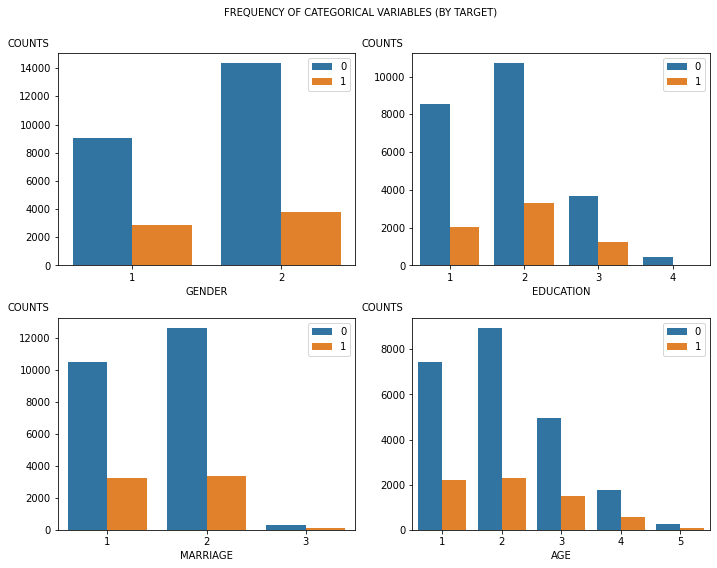

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(10,8), facecolor='white')
f.suptitle("FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)",size=10)

ax1 = sns.countplot(x='GENDER', hue = 'DEFAULT', data=df, ax=axes[0,0])
ax2 = sns.countplot(x='EDUCATION', hue = 'DEFAULT', data=df, ax=axes[0,1])
ax3 = sns.countplot(x='MARRIAGE', hue = 'DEFAULT', data=df, ax=axes[1,0])
ax4 = sns.countplot(x='AGE', hue = 'DEFAULT',data=df, ax=axes[1,1])

# Setting legends to upper right
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax4.legend(loc="upper right")

# Changing ylabels to horizontal and changing their positions
ax1.set_ylabel('COUNTS', rotation=0, labelpad=40)  # Labelpad adjusts distance of the title from the graph
ax1.yaxis.set_label_coords(-0.1,1.02)              # (x, y)
ax2.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax2.yaxis.set_label_coords(-0.1,1.02)
ax3.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax3.yaxis.set_label_coords(-0.1,1.02)
ax4.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax4.yaxis.set_label_coords(-0.1,1.02)

# Shifting the Super Title higher
f.tight_layout()  # Prevents graphs from overlapping with each other
f.subplots_adjust(top=0.9);

In [ ]:
# generate binary values using get_dummies
ed = pd.get_dummies(df['EDUCATION'],prefix='EDUCATION')
mr = pd.get_dummies(df['MARRIAGE'], prefix='MARRIAGE' )
age = pd.get_dummies(df['AGE'], prefix='AGE' )

# merge with main df bridge_df on key values
df = df.join(age)
df = df.join(mr)
df= df.join(ed)

In [ ]:
df.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,AGE_1,AGE_2,AGE_3,AGE_4,AGE_5,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,20000.0,2,2,1,1,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,1,0,0,0,1,0,0
1,120000.0,2,2,2,1,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1,0,0,0,0,0,1,0,0,1,0,0
2,90000.0,2,2,2,2,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,50000.0,2,2,1,2,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,50000.0,1,2,1,4,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [ ]:
df = df.drop(['EDUCATION','MARRIAGE','AGE','AGE_5','MARRIAGE_3','EDUCATION_4'], axis = 1)
df.head()

,LIMIT_BAL,GENDER,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,AGE_1,AGE_2,AGE_3,AGE_4,MARRIAGE_1,MARRIAGE_2,EDUCATION_1,EDUCATION_2,EDUCATION_3
0,20000.0,2,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1,0,0,0,1,0,0,1,0
1,120000.0,2,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1,0,0,0,0,1,0,1,0
2,90000.0,2,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,0,1,0,1,0
3,50000.0,2,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0,1,0,0,1,0
4,50000.0,1,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,0,0,1,1,0,0,1,0


In [ ]:
df.shape

(30000, 30)

<function matplotlib.pyplot.show>

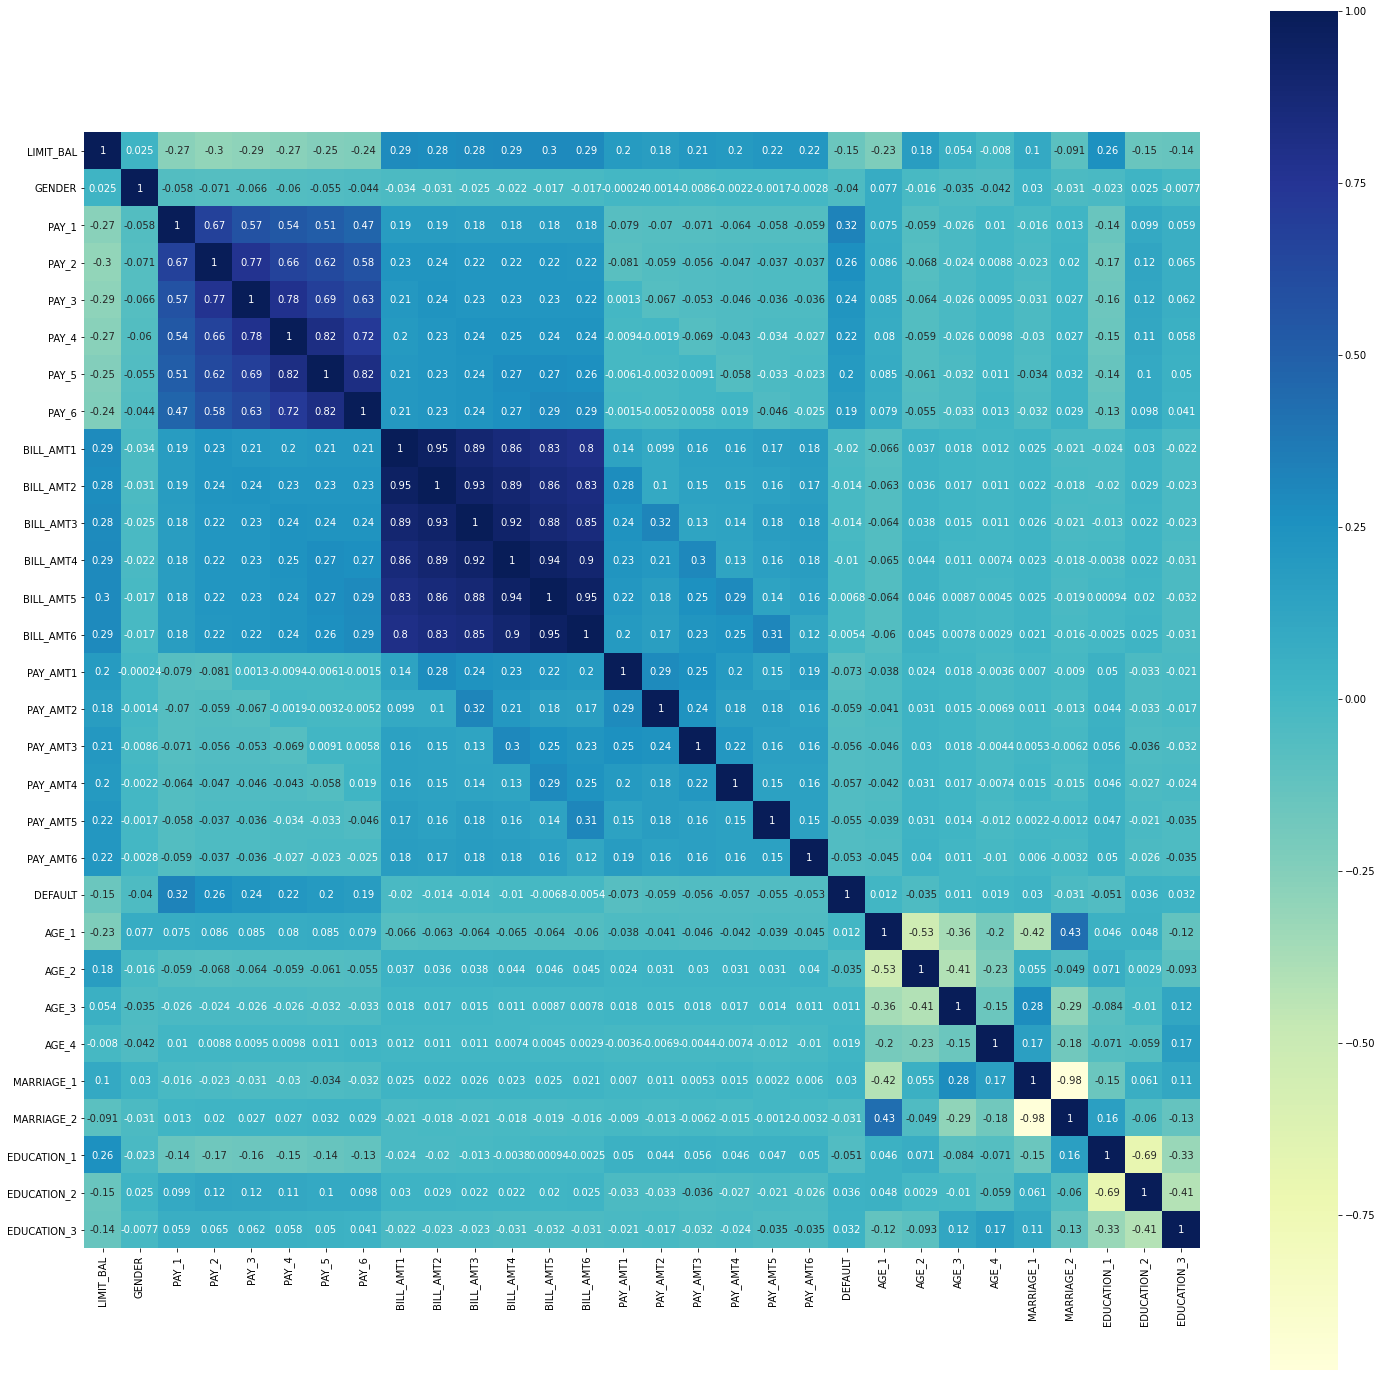

In [ ]:
plt.figure(figsize=(25,25))
p = sns.heatmap(df.corr(), cmap='YlGnBu', annot = True, square= True)
plt.show

## 6.Importing Required Libraries

In [ ]:
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier

# Classifier Metrics 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

# Pre-processing packages
from sklearn.preprocessing import StandardScaler

# CV, Gridsearch, train_test_split, model selection packages
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

## 7.Nosampling + Scaled

In [ ]:
## Baseline model performance evaluation

# to give model baseline report with cross-validation in dataframe 
def baseline_report_cv_(model, X, y, n_splits, name):
    """
    Accepts a model object, X (independent variables), y (target), n_splits and name of the model
    and returns a model with various scoring metrics of each classifier model on a cross-validation split
    ----
    Input: model object, X, y, n_splits (integer), name (str)
    Output: Various metric scores of a model.
    """
    # Splitting the data into 80% training/validation data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     # Splitting the training data into 60% training data and 20% validation data.
#     X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=69)
     
    # Creating a shuffled kfold of 5
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42) 
    
    accuracy     = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='roc_auc'))
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'timetaken'    : [0]       })   # timetaken for comparison later
    return df_model

In [ ]:
%timeit
## Scaled Dataset Model performance evaluation

# to evaluate baseline models
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
gnb = GaussianNB()
lrsvc = LinearSVC()
#mlpc = MLPClassifier(hidden_layer_sizes=(30,30,30),max_iter=10000),
rfc = RandomForestClassifier(max_depth=12,min_samples_split=5)
adbc = AdaBoostClassifier()
bagc = BaggingClassifier()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.drop('DEFAULT',axis=1)
y = df['DEFAULT']

## Scale data (just scale everything lol)
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# to concat all models
df_models = pd.concat([baseline_report_cv_(lr, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_(dt, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_(lrsvc, X, y, 5, 'LinearSVC'),
                       baseline_report_cv_(rfc, X, y, 5, 'RandomForest'),
                       baseline_report_cv_(adbc, X, y, 5, 'AdaBoost'),
                       baseline_report_cv_(bagc, X, y, 5, 'Bagging')
                       ], axis=0).reset_index()

df_models_scale = df_models.drop('index', axis=1)
df_models_scale

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,LogisticRegression,0.810500,0.714669,0.243394,0.362804,0.722647,0
1,KNN,0.788000,0.537390,0.321686,0.402328,0.697526,0
2,DecisionTree,0.723417,0.382634,0.413317,0.396174,0.613870,0
3,GaussianNB,0.684583,0.384292,0.661402,0.483249,0.733639,0
4,LinearSVC,0.802917,0.729556,0.176140,0.284061,0.719893,0
5,RandomForest,0.818083,0.671195,0.355093,0.460047,0.779050,0
6,AdaBoost,0.816875,0.683247,0.325328,0.440501,0.772168,0
7,Bagging,0.805250,0.609622,0.339511,0.434042,0.729834,0


## 8.OverSampling + Scaled

In [ ]:
## Oversample Dataset model performance evaluation

def baseline_report_cv_oversampling(model, X, y, n_splits, name):
    """
    Accepts a model object, X (independent variables), y (target), n_splits and name of the model, oversamples the data
    and returns a model with various scoring metrics of each classifier model on a cross-validation split
    ----
    Input: model object, X, y, n_splits (integer), name (str)
    Output: Various metric scores of a model.
    """
    # Allows for oversampling if you forget to initialize it before running func
    from imblearn.over_sampling import RandomOverSampler
    
    # Splitting the data into 80% training/validation data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    # Splitting the training data into 60% training data and 20% validation data.
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=69)
    
    
    #this helps with the way kf will generate indices below
    X_train_val, y_train_val = np.array(X_train_val), np.array(y_train_val)
    
    
    # Creating a shuffled kfold of 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1000) 
    
    clf_model_acc_scores_cv = []
    clf_model_precision_scores_cv = []
    clf_model_recall_scores_cv = []
    clf_model_f1_scores_cv = []
    clf_model_rocauc_scores_cv = []
    
    # Manual Cross-Validation
    for train_ind, val_ind in kf.split(X_train_val, y_train_val):

        # Assigning train and validation values for an individual fold
        X_train, y_train = X_train_val[train_ind], y_train_val[train_ind]
        X_val, y_val = X_train_val[val_ind], y_train_val[val_ind] 

        # Creating the OverSampled data
        X_resampled, y_resampled = RandomOverSampler(random_state=69).fit_sample(X_train, y_train)
        
        # Initializing model
        clf_model = model.fit(X_resampled, y_resampled) # Train model on SMOTE'd data
        y_pred = clf_model.predict(X_val)  # Y pred after testing on validation data split
        
        # Save scores of model
        clf_model_acc_score = accuracy_score(y_val, y_pred)
        clf_model_precision_score = precision_score(y_val, y_pred)
        clf_model_recall_score = recall_score(y_val, y_pred)
        clf_model_f1_score = f1_score(y_val, y_pred)   
        clf_model_rocauc_score = roc_auc_score(y_val, y_pred)
        
        # Append scores of model their scoring lists
        clf_model_acc_scores_cv.append(clf_model_acc_score)
        clf_model_precision_scores_cv.append(clf_model_precision_score)
        clf_model_recall_scores_cv.append(clf_model_recall_score)
        clf_model_f1_scores_cv.append(clf_model_f1_score)
        clf_model_rocauc_scores_cv.append(clf_model_rocauc_score)
        
   
    accuracy     = np.mean(clf_model_acc_scores_cv)
    precision    = np.mean(clf_model_precision_scores_cv)
    recall       = np.mean(clf_model_recall_scores_cv)
    f1score      = np.mean(clf_model_f1_scores_cv)
    rocauc       = np.mean(clf_model_rocauc_scores_cv)
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'timetaken'    : [0]       })   # timetaken for comparison later
    return df_model

In [ ]:
%timeit
## Scaled Dataset Model performance evaluation

# to evaluate baseline models
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
gnb = GaussianNB()
lrsvc = LinearSVC()
#mlpc = MLPClassifier(hidden_layer_sizes=(30,30,30),max_iter=10000),
rfc = RandomForestClassifier(max_depth=12,min_samples_split=5)
adbc = AdaBoostClassifier()
bagc = BaggingClassifier()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.drop('DEFAULT',axis=1)
y = df['DEFAULT']

# Creating n_splits for the function since it already has kfold creation in them
n_splits = 5

## Scale data 
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# to concat all models
df_models = pd.concat([baseline_report_cv_oversampling(lr, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_oversampling(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_oversampling(dt, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_oversampling(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_oversampling(lrsvc, X, y, 5, 'LinearSVC'),
                       baseline_report_cv_oversampling(rfc, X, y, 5, 'RandomForest'),
                       baseline_report_cv_oversampling(adbc, X, y, 5, 'AdaBoost'),
                       baseline_report_cv_oversampling(bagc, X, y, 5, 'Bagging')
                       ], axis=0).reset_index()

df_models_scale_oversampled = df_models.drop('index', axis=1)
df_models_scale_oversampled

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,LogisticRegression,0.680958,0.372078,0.649179,0.472857,0.669621,0
1,KNN,0.658208,0.343627,0.603754,0.437898,0.638677,0
2,DecisionTree,0.726500,0.381579,0.385394,0.383255,0.604255,0
3,GaussianNB,0.507042,0.284800,0.814317,0.421800,0.616882,0
4,LinearSVC,0.685958,0.376260,0.643912,0.474780,0.670948,0
5,RandomForest,0.786542,0.514951,0.553885,0.533687,0.703128,0
6,AdaBoost,0.756208,0.460385,0.610856,0.524937,0.704130,0
7,Bagging,0.794042,0.545827,0.395380,0.458476,0.651168,0


## 9.UnderSampling + Scaled

In [ ]:
## Undersample Dataset model performance evaluation


def baseline_report_cv_undersampling(model, X, y, n_splits, name):
    """
    Accepts a model object, X (independent variables), y (target), n_splits and name of the model, undersamples the data
    and returns a model with various scoring metrics of each classifier model on a cross-validation split
    ----
    Input: model object, X, y, n_splits (integer), name (str)
    Output: Various metric scores of a model.
    """
    # Allows for undersampling if you forget to initialize it before running func
    from imblearn.under_sampling import RandomUnderSampler
    
    # Splitting the data into 80% training/validation data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    # Splitting the training data into 60% training data and 20% validation data.
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=69)
    
    
    #this helps with the way kf will generate indices below
    X_train_val, y_train_val = np.array(X_train_val), np.array(y_train_val)
    
    
    # Creating a shuffled kfold of 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1000) 
    
    clf_model_acc_scores_cv = []
    clf_model_precision_scores_cv = []
    clf_model_recall_scores_cv = []
    clf_model_f1_scores_cv = []
    clf_model_rocauc_scores_cv = []
    
    # Manual Cross-Validation
    for train_ind, val_ind in kf.split(X_train_val, y_train_val):

        # Assigning train and validation values for an individual fold
        X_train, y_train = X_train_val[train_ind], y_train_val[train_ind]
        X_val, y_val = X_train_val[val_ind], y_train_val[val_ind] 

        # Creating the UnderSampled data
        X_resampled, y_resampled = RandomUnderSampler(random_state=69).fit_sample(X_train, y_train)
        
        # Initializing model
        clf_model = model.fit(X_resampled, y_resampled) # Train model on SMOTE'd data
        y_pred = clf_model.predict(X_val)  # Y pred after testing on validation data split
        
        # Save scores of model
        clf_model_acc_score = accuracy_score(y_val, y_pred)
        clf_model_precision_score = precision_score(y_val, y_pred)
        clf_model_recall_score = recall_score(y_val, y_pred)
        clf_model_f1_score = f1_score(y_val, y_pred)   
        clf_model_rocauc_score = roc_auc_score(y_val, y_pred)
        
        # Append scores of model their scoring lists
        clf_model_acc_scores_cv.append(clf_model_acc_score)
        clf_model_precision_scores_cv.append(clf_model_precision_score)
        clf_model_recall_scores_cv.append(clf_model_recall_score)
        clf_model_f1_scores_cv.append(clf_model_f1_score)
        clf_model_rocauc_scores_cv.append(clf_model_rocauc_score)
        

    
    accuracy     = np.mean(clf_model_acc_scores_cv)
    precision    = np.mean(clf_model_precision_scores_cv)
    recall       = np.mean(clf_model_recall_scores_cv)
    f1score      = np.mean(clf_model_f1_scores_cv)
    rocauc       = np.mean(clf_model_rocauc_scores_cv)
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'timetaken'    : [0]       })   # timetaken for comparison later
    return df_model

In [ ]:
%timeit
## Scaled Dataset Model performance evaluation

# to evaluate baseline models
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
gnb = GaussianNB()
lrsvc = LinearSVC()
#mlpc = MLPClassifier(hidden_layer_sizes=(30,30,30),max_iter=10000),
rfc = RandomForestClassifier(max_depth=12,min_samples_split=5)
adbc = AdaBoostClassifier()
bagc = BaggingClassifier()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.drop('DEFAULT',axis=1)
y = df['DEFAULT']

# Creating n_splits for the function since it already has kfold creation in them
n_splits = 5

## Scale data 
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# to concat all models
df_models = pd.concat([baseline_report_cv_undersampling(lr, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_undersampling(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_undersampling(dt, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_undersampling(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_oversampling(lrsvc, X, y, 5, 'LinearSVC'),
                       baseline_report_cv_undersampling(rfc, X, y, 5, 'RandomForest'),
                       baseline_report_cv_undersampling(adbc, X, y, 5, 'AdaBoost'),
                       baseline_report_cv_undersampling(bagc, X, y, 5, 'Bagging')
                       ], axis=0).reset_index()

df_models_scale_undersampled = df_models.drop('index', axis=1)
df_models_scale_undersampled

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,LogisticRegression,0.679958,0.370624,0.646178,0.470902,0.667870,0
1,KNN,0.678000,0.363703,0.612770,0.456256,0.654685,0
2,DecisionTree,0.617417,0.313712,0.618414,0.416159,0.617769,0
3,GaussianNB,0.539375,0.298291,0.792229,0.432419,0.630125,0
4,LinearSVC,0.685042,0.375185,0.642950,0.473667,0.670011,0
5,RandomForest,0.748958,0.450589,0.628791,0.524913,0.705875,0
6,AdaBoost,0.751167,0.453551,0.624123,0.525104,0.705704,0
7,Bagging,0.718167,0.404927,0.590590,0.480287,0.672457,0


## 10.Over_under_Sampling + Scaled

In [ ]:
## SMOTE Dataset model performance evaluation
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# Smote with no scaling with cross-validation in dataframe 
def baseline_report_cv_smote(model, X, y, n_splits, name):
    """
    Accepts a model object, X (independent variables), y (target), n_splits and name of the model, SMOTE's the data
    and returns a model with various scoring metrics of each classifier model on a cross-validation split
    ----
    Input: model object, X, y, n_splits (integer), name (str)
    Output: Various metric scores of a model.
    """
    from imblearn.over_sampling import SMOTE # Allows for smoting if you forget to initialize it before running func
    
    # Splitting the data into 80% training/validation data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    # Splitting the training data into 60% training data and 20% validation data.
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=69)
    
    
    #this helps with the way kf will generate indices below
    X_train_val, y_train_val = np.array(X_train_val), np.array(y_train_val)
    
    
    # Creating a shuffled kfold of 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1000) 
    
    clf_model_acc_scores_cv = []
    clf_model_precision_scores_cv = []
    clf_model_recall_scores_cv = []
    clf_model_f1_scores_cv = []
    clf_model_rocauc_scores_cv = []
    
    # Manual Cross-Validation
    for train_ind, val_ind in kf.split(X_train_val, y_train_val):

        # Assigning train and validation values for an individual fold
        X_train, y_train = X_train_val[train_ind], y_train_val[train_ind]
        X_val, y_val = X_train_val[val_ind], y_train_val[val_ind] 

        # Creating the SMOTE data
        X_smoted, y_smoted = SMOTE(random_state=69).fit_sample(X_train, y_train)
        
        # Initializing model
        clf_model = model.fit(X_smoted, y_smoted) # Train model on SMOTE'd data
        y_pred = clf_model.predict(X_val)  # Y pred after testing on validation data split
        
        # Save scores of model
        clf_model_acc_score = accuracy_score(y_val, y_pred)
        clf_model_precision_score = precision_score(y_val, y_pred)
        clf_model_recall_score = recall_score(y_val, y_pred)
        clf_model_f1_score = f1_score(y_val, y_pred)   
        clf_model_rocauc_score = roc_auc_score(y_val, y_pred)
        
        # Append scores of model their scoring lists
        clf_model_acc_scores_cv.append(clf_model_acc_score)
        clf_model_precision_scores_cv.append(clf_model_precision_score)
        clf_model_recall_scores_cv.append(clf_model_recall_score)
        clf_model_f1_scores_cv.append(clf_model_f1_score)
        clf_model_rocauc_scores_cv.append(clf_model_rocauc_score)
        

    
    accuracy     = np.mean(clf_model_acc_scores_cv)
    precision    = np.mean(clf_model_precision_scores_cv)
    recall       = np.mean(clf_model_recall_scores_cv)
    f1score      = np.mean(clf_model_f1_scores_cv)
    rocauc       = np.mean(clf_model_rocauc_scores_cv)
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'timetaken'    : [0]       })   # timetaken for comparison later
    return df_model

In [ ]:
%timeit
## Scaled Dataset Model performance evaluation

# to evaluate baseline models
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
gnb = GaussianNB()
lrsvc = LinearSVC()
mlpc = MLPClassifier(hidden_layer_sizes=(30,30,30),max_iter=10000),
rfc = RandomForestClassifier(max_depth=12,min_samples_split=5)
adbc = AdaBoostClassifier()
bagc = BaggingClassifier()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.drop('DEFAULT',axis=1)
y = df['DEFAULT']

# Creating n_splits for the function since it already has kfold creation in them
n_splits = 5

## Scale data 
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# to concat all models
df_models = pd.concat([baseline_report_cv_smote(lr, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_smote(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_smote(dt, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_smote(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_smote(lrsvc, X, y, 5, 'LinearSVC'),
                       baseline_report_cv_smote(rfc, X, y, 5, 'RandomForest'),
                       baseline_report_cv_smote(adbc, X, y, 5, 'AdaBoost'),
                       baseline_report_cv_smote(bagc, X, y, 5, 'Bagging')
                       ], axis=0).reset_index()

df_models_scaled_cv_smote = df_models.drop('index', axis=1)
df_models_scaled_cv_smote

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,LogisticRegression,0.671667,0.364340,0.656114,0.468303,0.666136,0
1,KNN,0.663458,0.346560,0.593521,0.437490,0.638378,0
2,DecisionTree,0.707833,0.369301,0.458841,0.409024,0.618623,0
3,GaussianNB,0.446292,0.265324,0.853069,0.404647,0.592086,0
4,LinearSVC,0.674083,0.365989,0.652315,0.468694,0.666321,0
5,RandomForest,0.792000,0.529023,0.523048,0.525914,0.695625,0
6,AdaBoost,0.768792,0.478827,0.539084,0.506896,0.686516,0
7,Bagging,0.785333,0.517472,0.401449,0.451946,0.647793,0


The best model we have is under+oversampling with the recall us 0.85 and tge ROCAUC score 0.59


## 11.Feauture Selection

In [ ]:
# Check how many SCORE type we can use for the RFECV
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [ ]:
df.head()

,LIMIT_BAL,GENDER,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,AGE_1,AGE_2,AGE_3,AGE_4,MARRIAGE_1,MARRIAGE_2,EDUCATION_1,EDUCATION_2,EDUCATION_3
0,20000.0,2,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1,0,0,0,1,0,0,1,0
1,120000.0,2,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1,0,0,0,0,1,0,1,0
2,90000.0,2,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,0,1,0,1,0
3,50000.0,2,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0,1,0,0,1,0
4,50000.0,1,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,0,0,1,1,0,0,1,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

X = df.drop('DEFAULT',axis=1)
y = df['DEFAULT']

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X, y = smk.fit_sample(X,y)

rfc = LogisticRegression(random_state=42)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='recall')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=42,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='recall', step=1,
      verbose=0)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 11


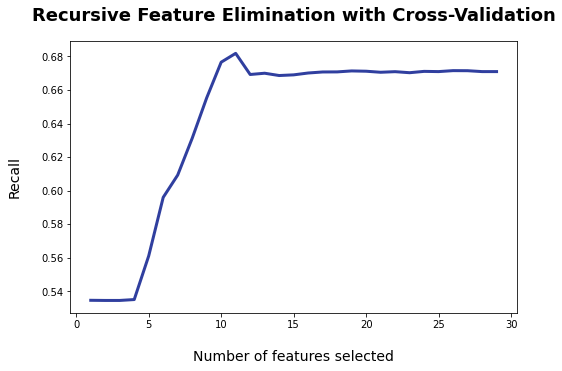

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('Recall', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
print(np.where(rfecv.support_ == True)[0])
print(df.columns)
print(df.shape)
# [ 0  2  3  4  8  9 10 14 15 24 26 27 28]

[ 0  2  3  8  9 10 14 15 26 27 28]
Index(['LIMIT_BAL', 'GENDER', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT', 'AGE_1', 'AGE_2',
       'AGE_3', 'AGE_4', 'MARRIAGE_1', 'MARRIAGE_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3'],
      dtype='object')
(30000, 30)


In [ ]:
 df_new = df[['LIMIT_BAL','PAY_1','PAY_2',
               'BILL_AMT1','BILL_AMT2','BILL_AMT3',
               'PAY_AMT1','PAY_AMT2',
               'MARRIAGE_2','EDUCATION_1','EDUCATION_2',
               'DEFAULT']]

In [ ]:
df_new.head()

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,MARRIAGE_2,EDUCATION_1,EDUCATION_2,DEFAULT
0,20000.0,2,2,3913.0,3102.0,689.0,0.0,689.0,0,0,1,1
1,120000.0,-1,2,2682.0,1725.0,2682.0,0.0,1000.0,1,0,1,1
2,90000.0,0,0,29239.0,14027.0,13559.0,1518.0,1500.0,1,0,1,0
3,50000.0,0,0,46990.0,48233.0,49291.0,2000.0,2019.0,0,0,1,0
4,50000.0,-1,0,8617.0,5670.0,35835.0,2000.0,36681.0,0,0,1,0


## 12.Apply model in the new dataset

In [ ]:
%timeit
## Scaled Dataset Model performance evaluation

# to evaluate baseline models
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
gnb = GaussianNB()
lrsvc = LinearSVC()
mlpc = MLPClassifier(hidden_layer_sizes=(30,30,30),max_iter=10000),
rfc = RandomForestClassifier(max_depth=12,min_samples_split=5)
adbc = AdaBoostClassifier()
bagc = BaggingClassifier()

# Scaling the inputs into model
# Separate data into X and Y components
X = df_new.drop('DEFAULT',axis=1)
y = df_new['DEFAULT']

# Creating n_splits for the function since it already has kfold creation in them
n_splits = 5

## Scale data 
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# to concat all models
df_models = pd.concat([baseline_report_cv_smote(lr, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_smote(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_smote(dt, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_smote(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_smote(lrsvc, X, y, 5, 'LinearSVC'),
                       baseline_report_cv_smote(rfc, X, y, 5, 'RandomForest'),
                       baseline_report_cv_smote(adbc, X, y, 5, 'AdaBoost'),
                       baseline_report_cv_smote(bagc, X, y, 5, 'Bagging')
                       ], axis=0).reset_index()

df_models_scaled_cv_smote_rfe = df_models.drop('index', axis=1)
df_models_scaled_cv_smote_rfe

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,LogisticRegression,0.680167,0.370486,0.642760,0.469701,0.666843,0
1,KNN,0.670375,0.350815,0.581607,0.437610,0.638505,0
2,DecisionTree,0.683292,0.339139,0.458702,0.389773,0.602827,0
3,GaussianNB,0.442292,0.264730,0.858090,0.404394,0.591242,0
4,LinearSVC,0.686208,0.375630,0.637656,0.472456,0.668881,0
5,RandomForest,0.763000,0.469369,0.563560,0.511927,0.691557,0
6,AdaBoost,0.756333,0.458553,0.572255,0.508728,0.690431,0
7,Bagging,0.751125,0.436201,0.438219,0.437097,0.638975,0


Conclusion: After Feature Selection,the best model is GaussianNB with 0.858 recall value.